In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/star-dataset/6 class csv.csv


In [2]:
# Import ploting library 
import matplotlib.pyplot as plt

In [3]:
# Read data and show stats
star_data = pd.read_csv("/kaggle/input/star-dataset/6 class csv.csv")
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Data Cleaning of Star colors

In [4]:
star_data.groupby("Star color")["Temperature (K)"].describe().sort_values("mean").index

Index(['Red', 'Orange', 'yellowish', 'Yellowish', 'Orange-Red', 'yellow-white',
       'White-Yellow', 'Pale yellow orange', 'White', 'Whitish', 'Blue-White',
       'Blue white', 'Yellowish White', 'Blue white ', 'white', 'Blue White',
       'Blue-white', 'Blue ', 'Blue'],
      dtype='object', name='Star color')

In [5]:
star_data["Star color"].replace(
    ["yellowish", "yellow-white", "Blue ", "white" ], 
    ["Yellowish", "Yellow-white", "Blue", "White"], inplace = True)

color_change = ((star_data["Star color"] == "Blue white") 
                | (star_data["Star color"] == "Blue white ") 
                | (star_data["Star color"] == "Blue White") 
                | (star_data["Star color"] == "Blue-white"))
    
star_data.loc[color_change, ["Star color"]] = "Blue-White"

## **Here I look at the distributions of the temperature for each star type. I make them all have the same axis.**

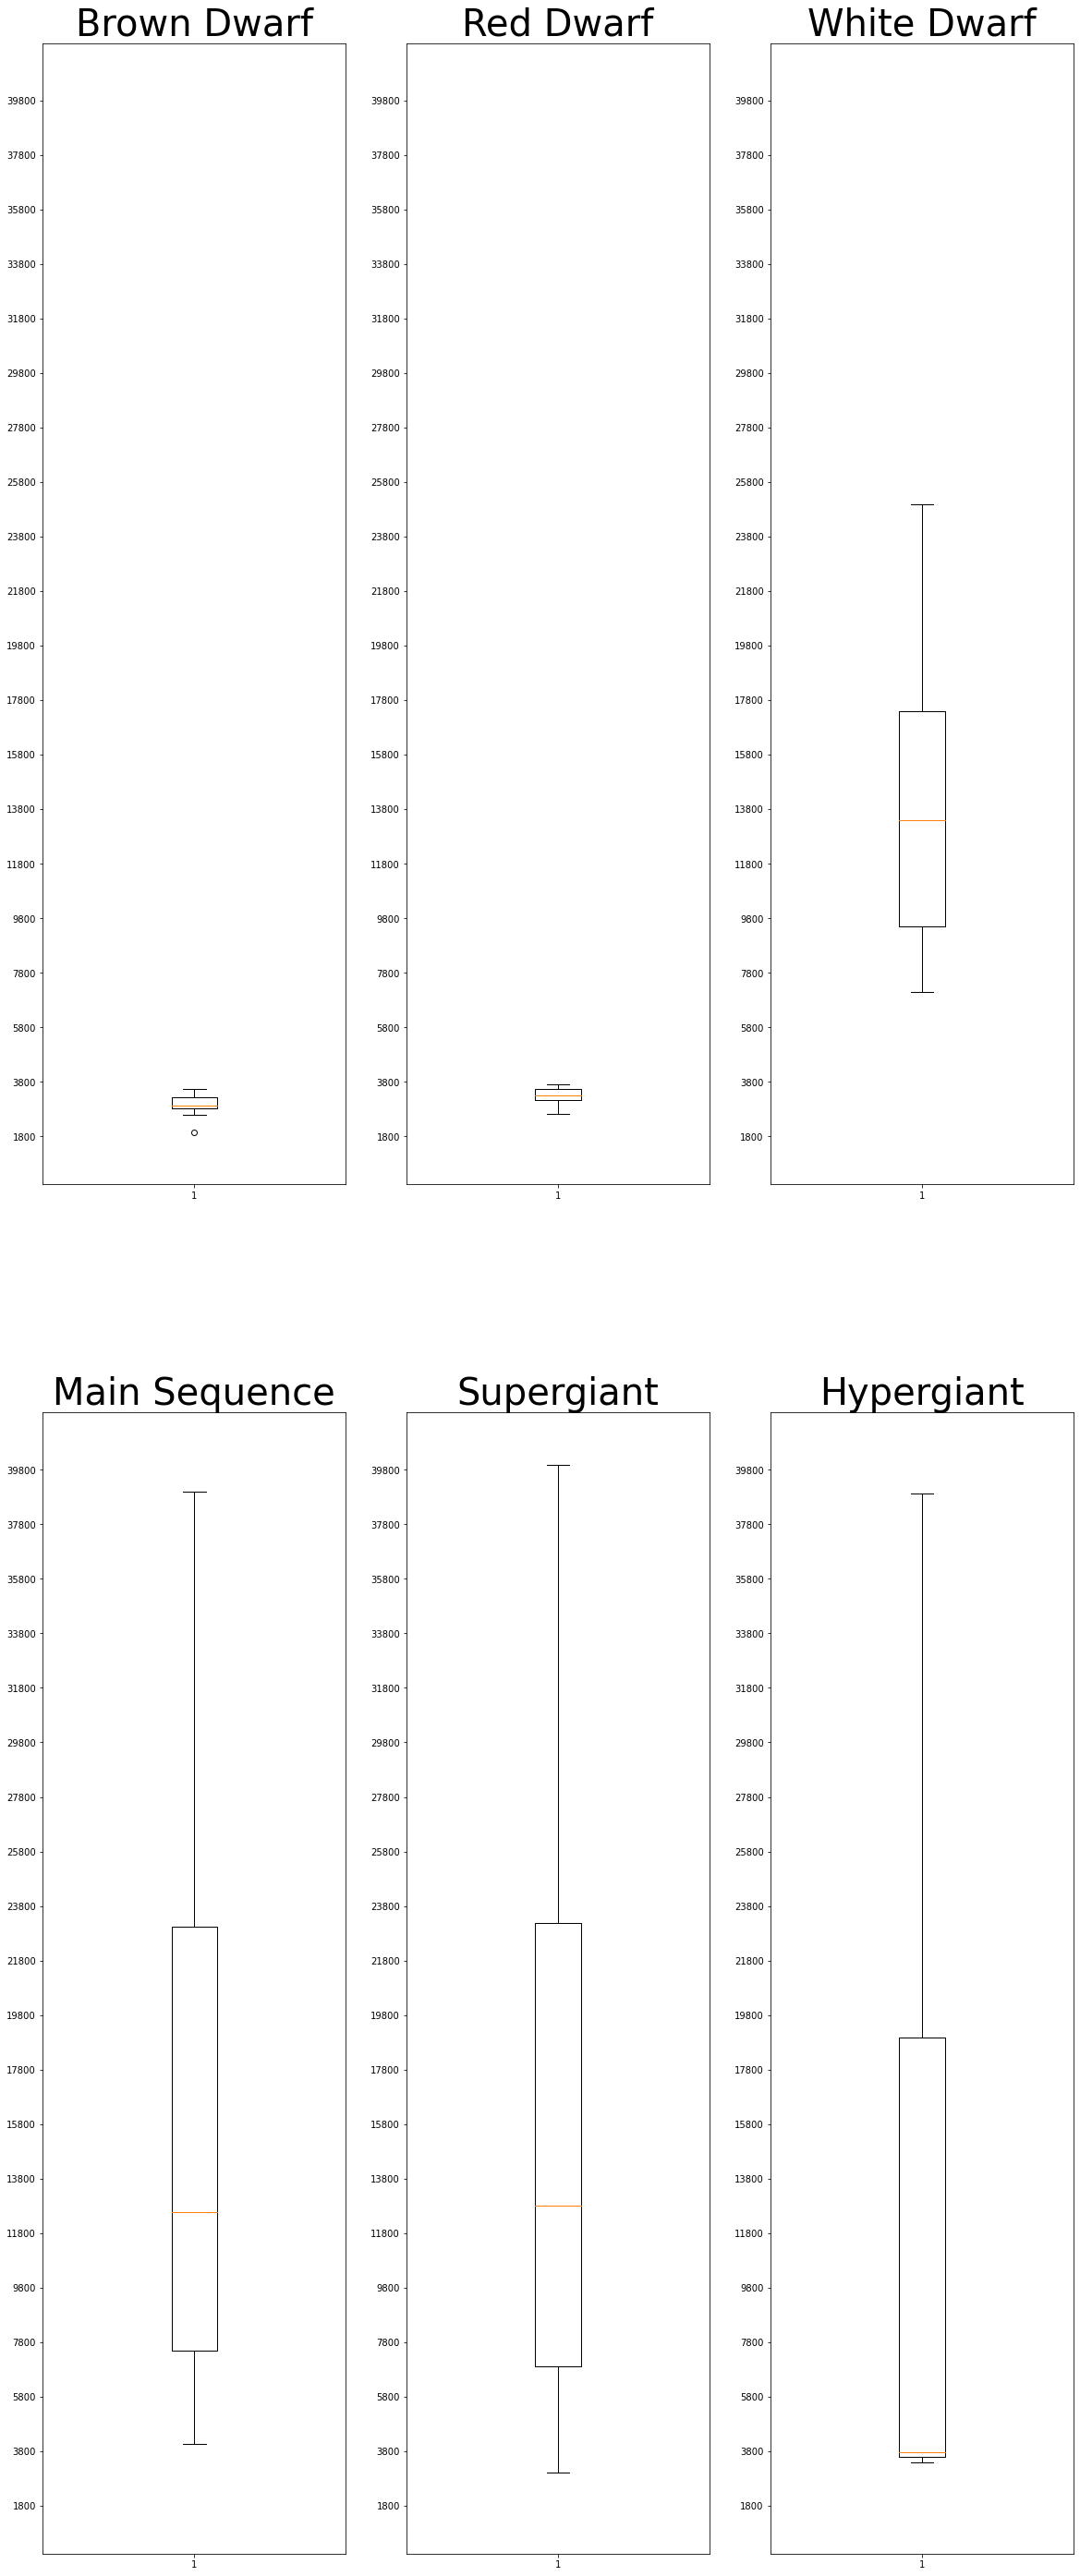

In [6]:
plt.figure(figsize=(20,50))

ax = plt.subplot(2,3,1) # 2 Row, 3 Columns, index 1
plt.boxplot(star_data[star_data["Star type"] == 0]["Temperature (K)"])
plt.yticks([*range(1800, 40000, 2000)])
plt.title("Brown Dwarf", fontsize = 40)

plt.subplot(2,3,2,sharey=ax) # 2 Row, 3 Columns, index 2
plt.boxplot(star_data[star_data["Star type"] == 1]["Temperature (K)"])
plt.title("Red Dwarf", fontsize = 40)

plt.subplot(2,3,3, sharey=ax) # 2 Row, 3 Columns, index 3
plt.boxplot(star_data[star_data["Star type"] == 2]["Temperature (K)"])
plt.title("White Dwarf", fontsize = 40)

plt.subplot(2,3,4, sharey=ax) # 2 Row, 3 Columns, index 4
plt.boxplot(star_data[star_data["Star type"] == 3]["Temperature (K)"])
plt.title("Main Sequence", fontsize = 40)

plt.subplot(2,3,5, sharey=ax) # 2 Row, 3 Columns, index 5
plt.boxplot(star_data[star_data["Star type"] == 4]["Temperature (K)"])
plt.title("Supergiant", fontsize = 40)

plt.subplot(2,3,6, sharey=ax) # 2 Row, 3 Columns, index 6
plt.boxplot(star_data[star_data["Star type"] == 5]["Temperature (K)"])
plt.title("Hypergiant", fontsize = 40)

plt.show()

In [7]:
star_data.groupby("Star type")["Temperature (K)"].describe()

,count,mean,std,min,25%,50%,75%,max
Star type,,,,,,,,
0,40.0,2997.950,332.276295,1939.0,2812.75,2935.0,3242.50,3531.0
1,40.0,3283.825,269.637258,2621.0,3132.75,3314.0,3527.50,3692.0
2,40.0,13931.450,4957.655189,7100.0,9488.75,13380.0,17380.00,25000.0
3,40.0,16018.000,10661.234972,4077.0,7479.25,12560.5,23030.00,39000.0
4,40.0,15347.850,10086.784628,3008.0,6899.50,12821.0,23181.25,40000.0
5,40.0,11405.700,11816.991886,3399.0,3603.75,3766.0,18976.00,38940.0


## **Here I look at the distributions of the temperature for each star type. I make them all have the different axes.**

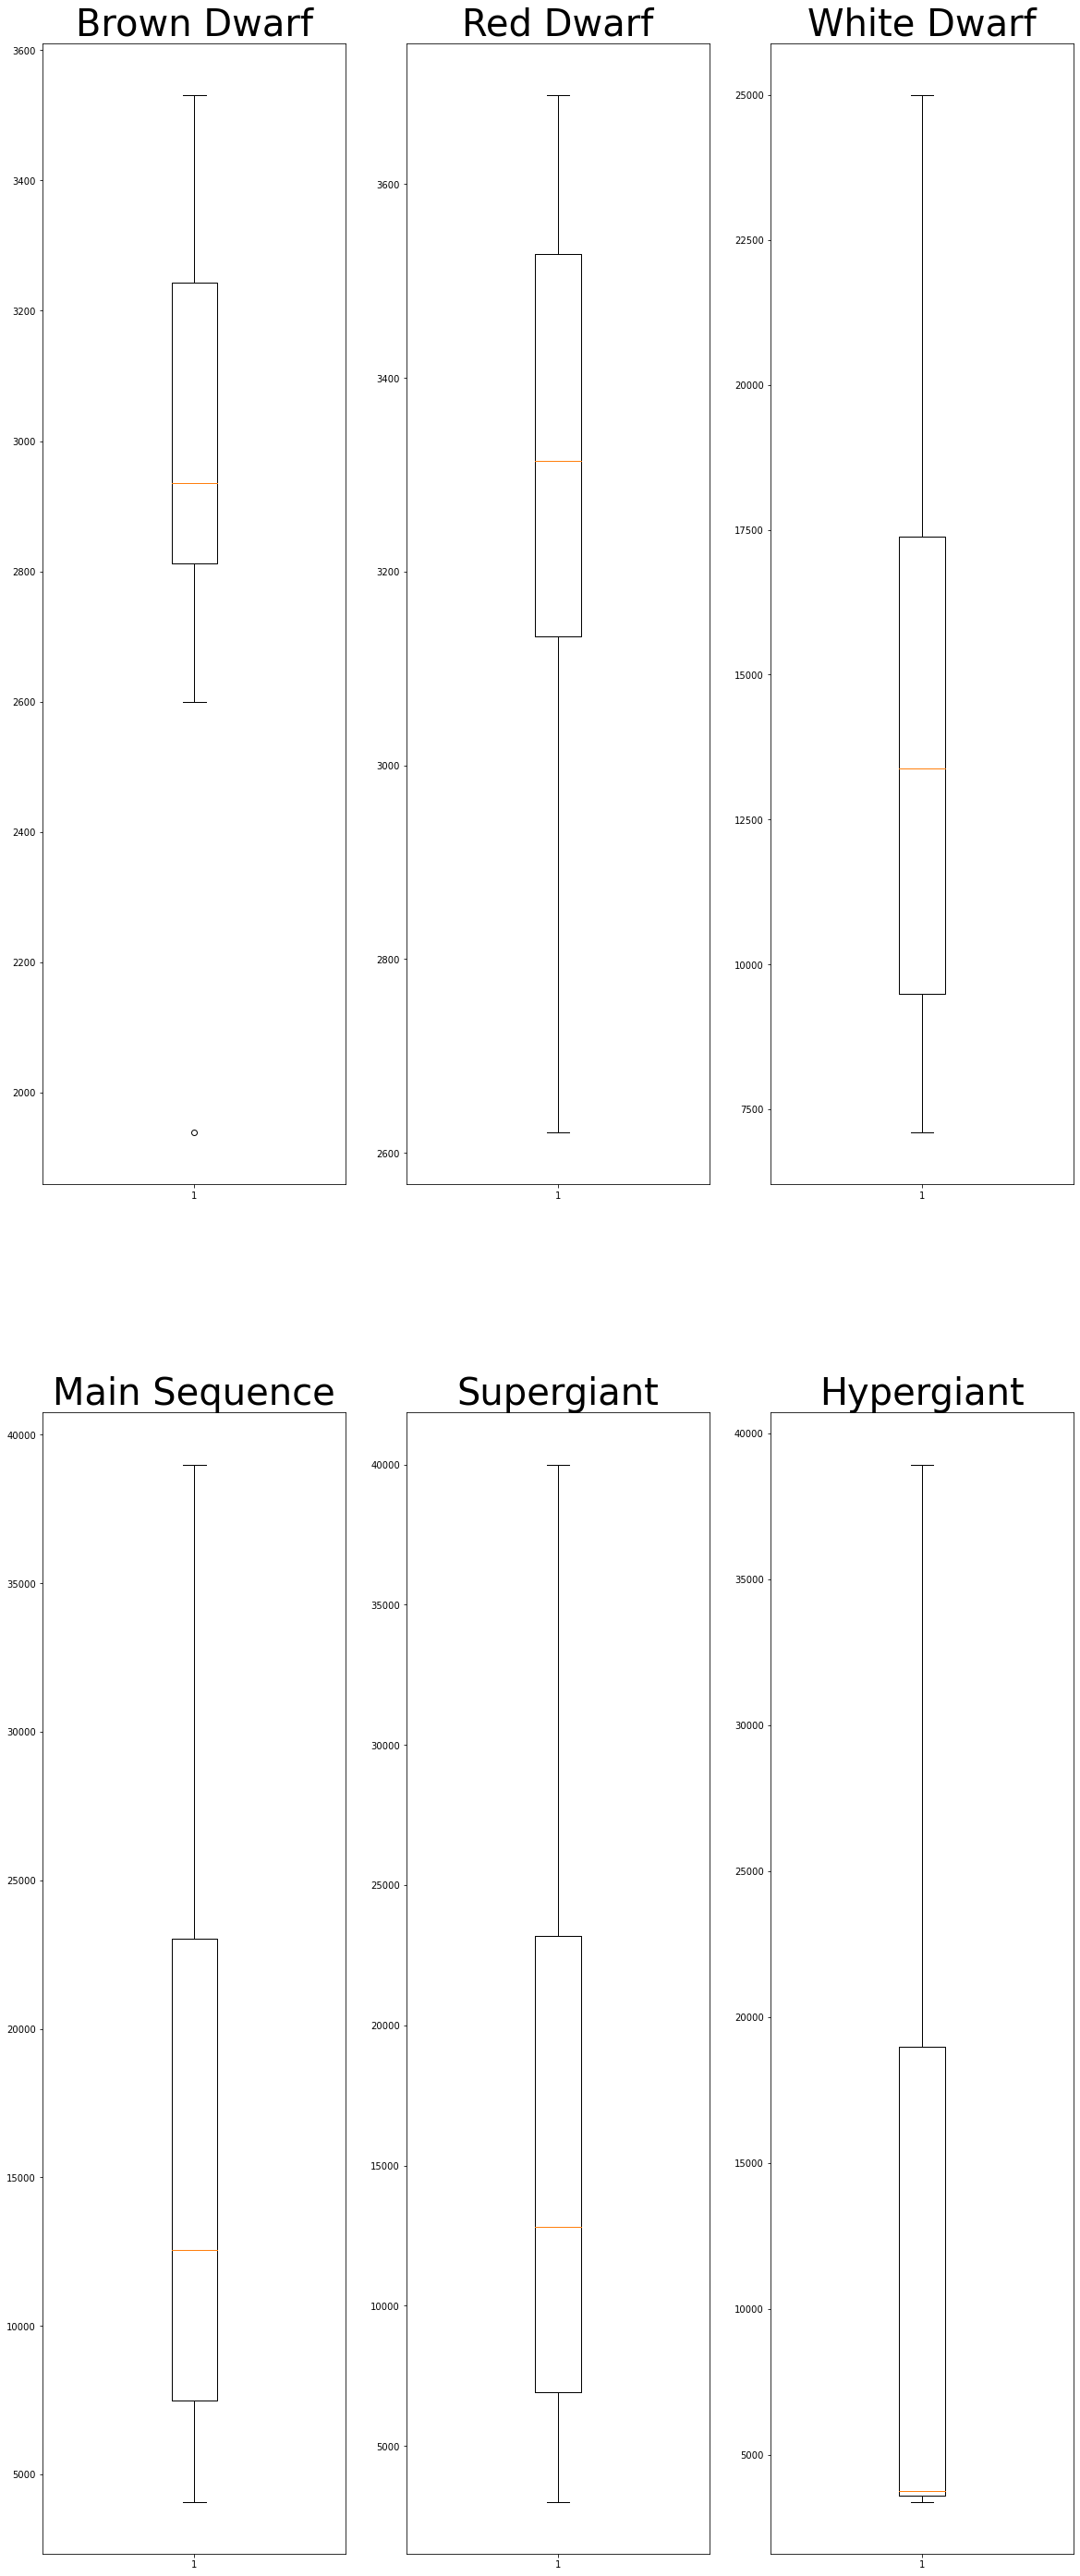

In [8]:
plt.figure(figsize=(20,50))

# c = "#331c20"
plt.subplot(2,3,1) # 2 Row, 3 Columns, index 1
plt.boxplot(star_data[star_data["Star type"] == 0]["Temperature (K)"])
plt.title("Brown Dwarf", fontsize = 40)

plt.subplot(2,3,2,) # 2 Row, 3 Columns, index 2
plt.boxplot(star_data[star_data["Star type"] == 1]["Temperature (K)"])
plt.title("Red Dwarf", fontsize = 40)

plt.subplot(2,3,3,) # 2 Row, 3 Columns, index 3
plt.boxplot(star_data[star_data["Star type"] == 2]["Temperature (K)"])
plt.title("White Dwarf", fontsize = 40)

plt.subplot(2,3,4,) # 2 Row, 3 Columns, index 4
plt.boxplot(star_data[star_data["Star type"] == 3]["Temperature (K)"])
plt.title("Main Sequence", fontsize = 40)

plt.subplot(2,3,5,) # 2 Row, 3 Columns, index 5
plt.boxplot(star_data[star_data["Star type"] == 4]["Temperature (K)"])
plt.title("Supergiant", fontsize = 40)

plt.subplot(2,3,6,) # 2 Row, 3 Columns, index 6
plt.boxplot(star_data[star_data["Star type"] == 5]["Temperature (K)"])
plt.title("Hypergiant", fontsize = 40)

plt.show()

# Look at Temp v. color

In [9]:
star_data.groupby("Star color")["Temperature (K)"].describe().sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
Star color,,,,,,,,
Red,112.0,3291.785714,490.780761,1939.0,2987.50,3324.0,3550.75,6850.0
Orange,2.0,4018.000000,380.423448,3749.0,3883.50,4018.0,4152.50,4287.0
Yellowish,3.0,4527.666667,451.502307,4077.0,4301.50,4526.0,4753.00,4980.0
Orange-Red,1.0,5112.000000,NaN,5112.0,5112.00,5112.0,5112.00,5112.0
Yellow-white,8.0,6466.250000,1049.074524,5300.0,5746.75,6158.0,6997.75,8250.0
White-Yellow,1.0,7100.000000,NaN,7100.0,7100.00,7100.0,7100.00,7100.0
Pale yellow orange,1.0,7230.000000,NaN,7230.0,7230.00,7230.0,7230.00,7230.0
Whitish,2.0,8876.000000,1165.311975,8052.0,8464.00,8876.0,9288.00,9700.0
White,10.0,9720.300000,2563.623176,7220.0,7930.00,8879.5,10239.25,14732.0


Text(0.5, 0, 'Temperatures (K)')

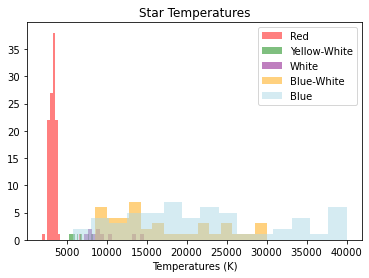

In [10]:
Red_Star = star_data[star_data["Star color"] == "Red"]["Temperature (K)"] # Get red stars
Yellow_white_star = star_data[star_data["Star color"] 
                              == "Yellow-white"]["Temperature (K)"] # Get yellow-white stars
White_star = star_data[star_data["Star color"] == "White"]["Temperature (K)"] # Get white stars
Blue_White_star = star_data[star_data["Star color"] 
                            == "Blue-White"]["Temperature (K)"] # Get blue-white stars
Blue = star_data[star_data["Star color"] == "Blue"]["Temperature (K)"] # Get blue stars

plt.hist(Red_Star, label="Red", alpha=0.5, color="Red", bins=15) # Histogram 
plt.hist(Yellow_white_star, label="Yellow-White", alpha=0.5, color="Green", bins=15) # Histogram 
plt.hist(White_star, label ="White", alpha=0.5, color="Purple", bins=15) # Histogram 
plt.hist(Blue_White_star, label ="Blue-White", alpha=0.5, color="orange", bins=15) # Histogram 
plt.hist(Blue, label ="Blue", alpha=0.5, color="#ADD8E6", bins=15) # Histogram
plt.legend()
plt.title("Star Temperatures")
plt.xlabel("Temperatures (K)")